<a href="https://colab.research.google.com/github/Vangzbill/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama      : Sabilla Luthfi Rahmadhan

No Absen  : 19

Kelas     : TI-3G
***

## Tugas Praktikum


1.   Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2.	Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [2]:
!pip install pytesseract

In [3]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3.	Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

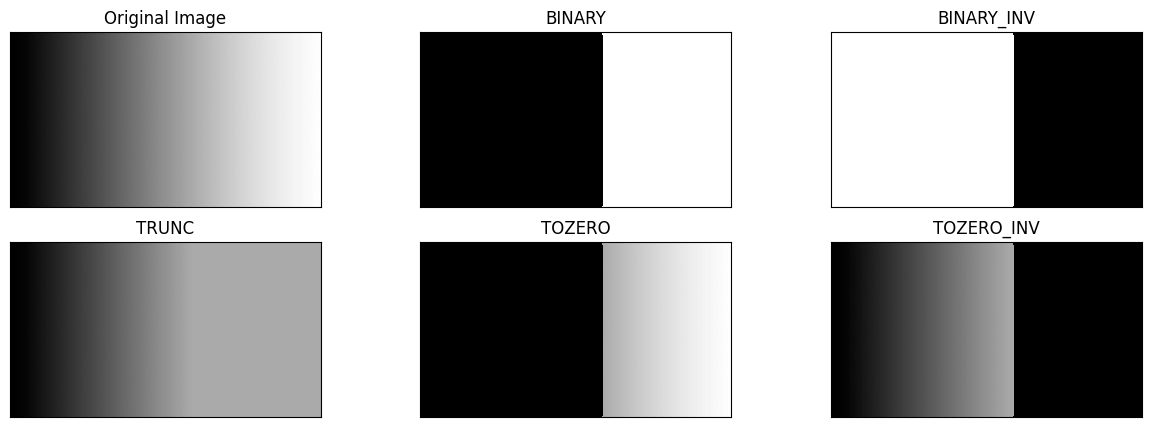

In [4]:
filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv.imread(filename)
thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)
thresh = 170      #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] = 255                                        #tanpa library
thresh1[img<=thresh] = 0

#2. thresh2 adalah binary thresholdinverse
thresh2 = 255 - thresh1                                          #tanpa library

#3. Threshold Truncate
thresh3[img>thresh] = thresh                                     #tanpa library

#4. Threshold Tozero
thresh4[img<=thresh] = 0                                         #tanpa library

#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0                                          #tanpa library

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()


4.	Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-5-bee1eeb67fb2>:28: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb
<ipython-input-5-bee1eeb67fb2>:29: RuntimeWarning: invalid value encountered in divide
  mf = (sumb - sumb) / wf


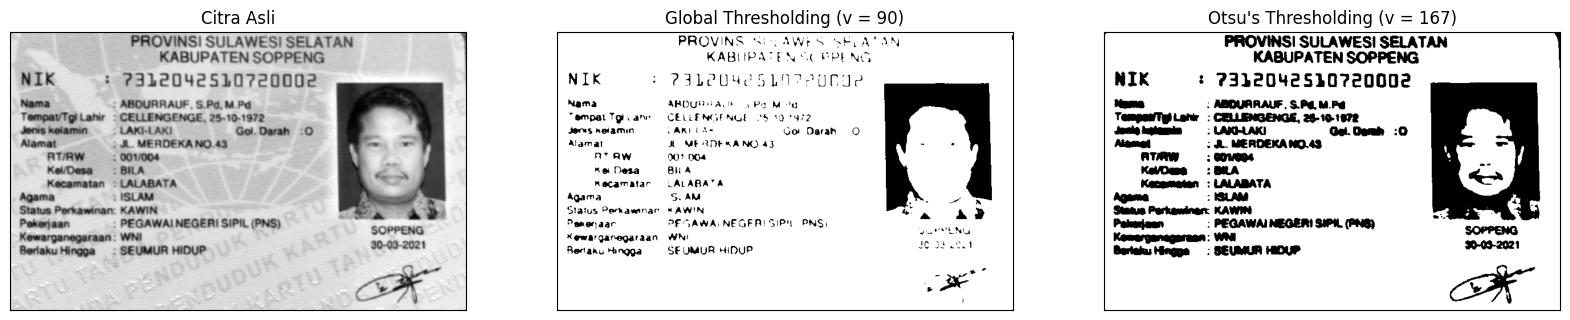

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
filename = '/content/drive/MyDrive/PCVK/Images/KTP.jpeg'
img_lgs = cv.imread(filename, 0)

# Apply Gaussian Blur
blur = cv.GaussianBlur(img_lgs, (5, 5), 0)

# Calculate the histogram
hist = cv.calcHist([blur], [0], None, [256], [0, 256])

hist_norm = hist.ravel() / hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
thresh = -1

for i in range(0, 255):
    wb += hist[i]
    wf = (img_lgs.shape[0] * img_lgs.shape[1]) - wb
    sumb += (i * hist[i])
    mb = sumb / wb
    mf = (sumb - sumb) / wf
    betweenvar = wb * wf * (mb - mf) * (mb - mf)

    if (betweenvar > varmax):
        varmax = betweenvar
        thresh = i

# Change the threshold value to 167
thresh = 167

x = "Otsu's Thresholding (v = " + str(thresh) + ")"
ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold(blur, thresh, 255, cv.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize=(20, 15))

for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

5.	Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

  * Anda dapat gunakan cv.calcHist untuk menampilkan histogram.
  * Buka link berikut https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html
  * Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).



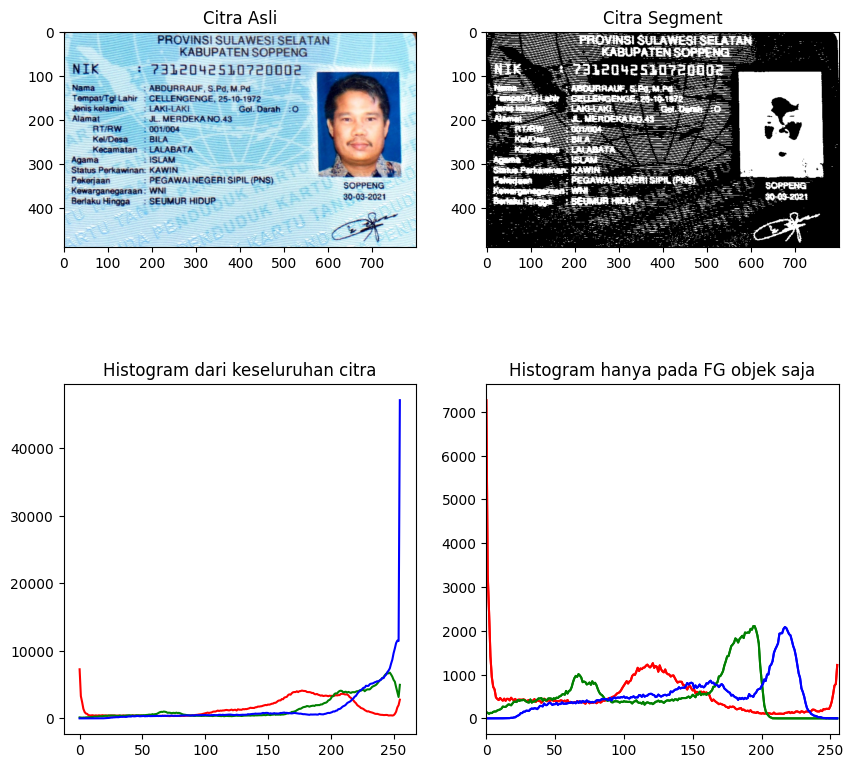

In [6]:
# No 5
filename = ('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
img = cv.imread(filename)
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

6.	Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

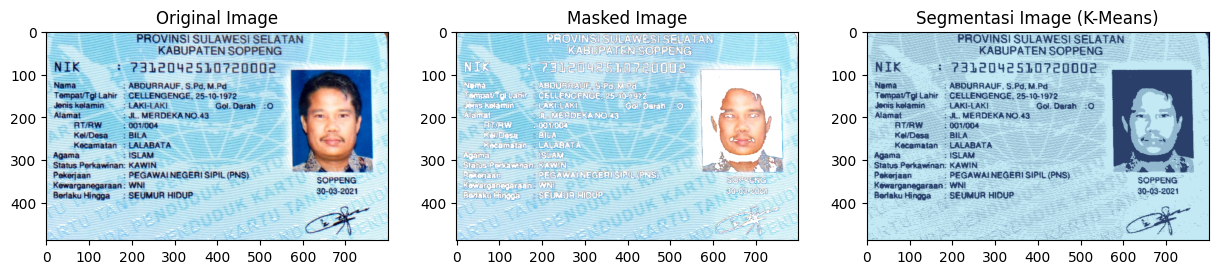

In [7]:
from sklearn.cluster import KMeans

# Load the image
filename = '/content/drive/MyDrive/PCVK/Images/KTP.jpeg'
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 1
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 3, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(1, 3, 3), plt.imshow(segmented_image)
plt.title('Segmentasi Image (K-Means)')

plt.show()

### **E. Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.**

1. Install PIP OCR

In [8]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (5,208 kB/s)
debconf: unable to ini

2. Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita tunjukan objek figure kita dengan method show()

In [9]:
def display(img,cmap='gray',):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray',)

3.	Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

In [10]:
from pytesseract import Output
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


4.	Menambahkan kotak untuk deteksi teksi pada gambar

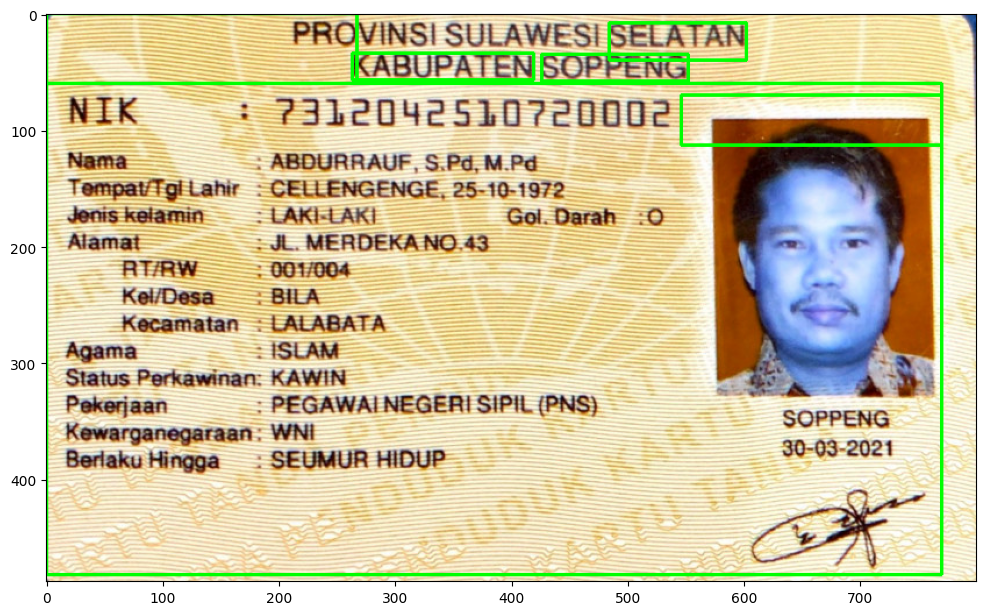

In [11]:
n_boxes = len(d['text'])
for i in range(n_boxes):
  if int(d['conf'][i]) > 60:
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
display(img)

5.	Hasil pembacaan KTP Menjadi text

NIK

Nama
Tempat/Tgi Lahir
Jenis kelamin
Alamat
RTRW
Kei/Desa
Kecamatan
Agama
Status Perkawinan
Pekerjaan
Kewarganegaraan
Berlaku Hingga

1 001/004

PROVINSI SULAWESI SELATAN
KABUPATEN SOPPENG

?31001420510720002

ABDURRAUF. S.Pd, M.Pd
CELLENGENGE. 25-10-1972
LAKI-LAKI Gol. Darah .O
JL. MERDEKA NO.43

BILA

LALABATA

ISLAM

KAWIN

PEGAWAI NEGERI SIPIL (PNS)
WNI

 

aa
SOPPENG

SEUMUR HIDUP 30-03-2021

TK
——

 



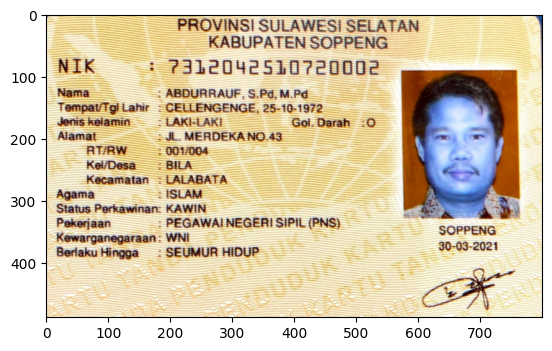

In [12]:
img = cv.imread("/content/drive/MyDrive/PCVK/Images/KTP.jpeg")
plt.imshow(img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

### **F.	Tugasnya adalah mengimplementasikan hasil citra yang telah diproses dengan  GLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapat pada KTP.**

Mengimplementasikan hasil citra yang telah diproses dengan GLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapat pada KTP.

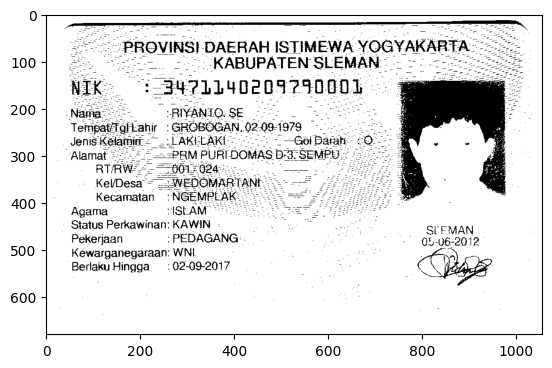


Hasil Ekstrak Teks

R PROVINSI DAERAH ISTIMEWA YOGYAKAR
KABUPATEN SLEMAN  -

71240209290001 |

Kecamatan
Agama
Status Perkawinan: KAWIN ka - : STEMAN
Pekerjaan : PEDAGANG | . 05-06-2012
Kewarganegaraan: WNI. . 5
Berlaku Hingga "02-09-2017 . aa

S,

     



In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract

# Baca citra KTP
ktp_img = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Images (1)/images_thres/ktp riyanto.png')
ktp_gray = cv.cvtColor(ktp_img, cv.COLOR_BGR2GRAY)

# Terapkan global thresholding pada citra KTP
global_threshold, ktp_thresholded = cv.threshold(ktp_gray, 127, 255, cv.THRESH_BINARY)

# Tampilkan citra hasil thresholding
plt.imshow(ktp_thresholded, cmap='gray')
plt.show()

# Ekstrak teks dari citra hasil thresholding
extracted_text = pytesseract.image_to_string(ktp_thresholded, lang="ind")

# Tampilkan teks yang diekstrak
print("\nHasil Ekstrak Teks\n\n"+extracted_text)